# IE 360 Assignment 1

## Introduction

### In this assignment, we are going to propose an argument about relation of some statistics. We will ask some questions and investigate relevant time series to answer these questions.

## Research Question

### We will start with the question of "Is the Selling Price of Republic Gold related with Consumer Price Index?". When we think of the gold selling price, it is not necessarily an accurate indicator of prices of consumer goods in the short term. The problem is that gold prices track the overall economy better than CPI because investors are faster to react to the macroeconomic changes, however, producers generally do not reflect these changes to prices of goods instantly. Still, in the long term, CPI should track the overall economy as well, with some lag. Therefore, we expect these statistics to be correlated.

### Another related statistic might be (Household) Credit Card Payments Index. CPI reflects the prices of consumer goods. Credit cards are used to buy goods. If prices of goods increase, credit card spendings for these goods should increase as well. Therefore, we expect Credit Card Payments Index to be correlated with CPI.

### If there is a high percent increase in CPI, this can be a result of recession. In recession, low production causes prices to increase, due to demand being higher than supply. If production is lower than normal, there should be higher number of unemployed people, specially unqualified employees that work in factories. If there are higher number of unemployed unqualified people, we expect job search volume of İŞKUR to increase. It is because unqualified people generally ask government for assistance and İŞKUR is a governmental organization.

### We can compare CPI change rate with search volumes for different periods. Equivalently, we can compare CPI with cumulative sum of search volumes as well. Due to its convenience, we will opt for second option.

## Coding Part

In [63]:
# Import required libraries

require(readxl)
require(data.table)
setwd('D:\\Ders\\5_Spring 2022 Lectures\\IE 360\\Homework')

In [93]:
# Read data, rename columns and convert date column to date type

data_ = read_excel('EVDS_2.xlsx')

data1 = data.table(data_)
colnames(data1) = c('date', 'credit_card_payments', 'republic_gold_selprice', 'consumer_price_index')
data1$date = as.Date(paste(data1$date,"-01",sep=""))

In [94]:
# Prepare trends data

iskur = read.csv('iskur.csv', skip=1, col.names=c('date', 'iskur_search'))
iskur$date = as.Date(paste(iskur$date,"-01",sep=""))

In [95]:
# Convert search volume to cumulative sum of the search volume so that it will be comparable to macroeconomic indicators.

iskur$iskur_search = cumsum(iskur$iskur_search)

In [96]:
temp_data = copy(data1)
temp_data = temp_data[complete.cases(temp_data),]  # Select rows with no missing value.

# Convert variables from chr to numeric.
temp_data$credit_card_payments = as.numeric(temp_data$credit_card_payments)

In [97]:
# Merge EVDS data with Trends data

temp_data = merge(x=temp_data, y=iskur, on='date')

In [98]:
# Scale variables so that it is easier to compare/plot them.

for(i in 2:5){
  temp_data[,i] = scale(temp_data[,i,with=FALSE])
}

# Assign prepared 'temp_data' object to variable named 'data', for ease of use.

data = temp_data

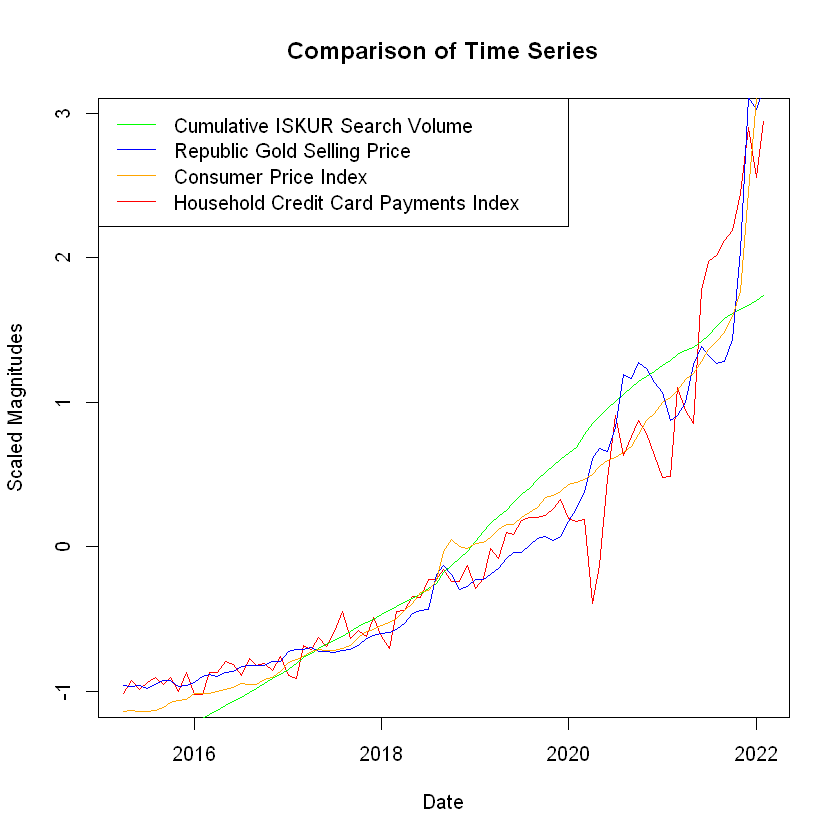

In [116]:
# Plot all the series

plot(data$date, data$credit_card_payments, type='l', col='red', xlab='Date',
     ylab='Scaled Magnitudes')
lines(data$date, data$iskur_search, col='green')
lines(data$date, data$republic_gold_selprice, col='blue')
lines(data$date, data$consumer_price_index, col='orange')
legend(x = "topleft",# Position
       legend = c("Cumulative ISKUR Search Volume", "Republic Gold Selling Price", "Consumer Price Index",
                  "Household Credit Card Payments Index"),  # Legend texts
       lty = c(1, 1, 1, 1), # Line types
       col = c('green', 'blue', 'orange', 'red'), # Line colors
       lwd = 1)
title("Comparison of Time Series")

### As we can see, scaled versions of the variables are highly correlated with each other. There is a sharp decrease in the credit card payments in the 2020, which we know is due to COVID. Even after that decrease, credit card payments rapidly increased and got on track with other statistics.

In [112]:
# Calculate correlation between variables

cor_credit_gold = cor(data$credit_card_payments, data$republic_gold_selprice)
cor_credict_cpi = cor(data$credit_card_payments, data$consumer_price_index)
cor_credit_iskur = cor(data$credit_card_payments, data$iskur_search)
cor_gold_cpi = cor(data$republic_gold_selprice, data$consumer_price_index)
cor_gold_iskur = cor(data$republic_gold_selprice, data$iskur_search)
cor_cpi_iskur = cor(data$consumer_price_index, data$iskur_search)

In [113]:
# Print correlation coefficients between all the variables

print(paste("Correlation between credit card payments index and republic gold selling price:",round(cor_credit_gold,4)))
print(paste("Correlation between credit card payments index and consumer price index:",round(cor_credict_cpi,4)))
print(paste("Correlation between credit card payments index and 'iskur' cumulative search volume:",round(cor_credit_iskur,4)))
print(paste("Correlation between republic gold selling price and consumer price index:",round(cor_gold_cpi,4)))
print(paste("Correlation between republic gold selling price and 'iskur' cumulative search volume:",round(cor_gold_iskur,4)))
print(paste("Correlation between consumer price index and 'iskur' cumulative search volume:",round(cor_cpi_iskur,4)))

[1] "Correlation between credit card payments index and republic gold selling price: 0.9563"
[1] "Correlation between credit card payments index and consumer price index: 0.9612"
[1] "Correlation between credit card payments index and 'iskur' cumulative search volume: 0.908"
[1] "Correlation between republic gold selling price and consumer price index: 0.9796"
[1] "Correlation between republic gold selling price and 'iskur' cumulative search volume: 0.9267"
[1] "Correlation between consumer price index and 'iskur' cumulative search volume: 0.9497"


### Correlations between all the variables are high ( > 0.7, strongly correlated).

## Conclusion

### By our investigations, with the plot and correlation coefficients, we can say that our questions made sense and these statistics are correlated. However, correlation does not imply causation. Even though they are correlated in the time span that we investigated, it might not be the case in the future (i.e. Gold might become obsolete and Bitcoin starts to be used instead). Main idea of this assignment is that some statistics might have relation/correlation with each other. We might use these relations to explain one statistics with another.

## References

* Data is taken from: https://evds2.tcmb.gov.tr/index.php?/evds/serieMarket